In [4]:
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("Plots")
using DifferentialEquations
using Plots

   Updating registry at `~/.julia/registries/General`
######################################################################### 100.0%
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


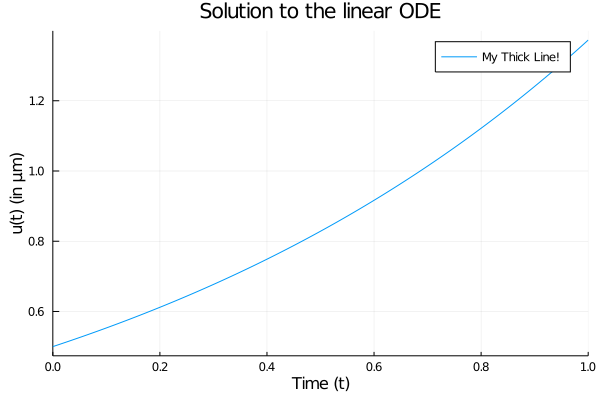

In [14]:
f(u,p,t) = 1.01*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
using Plots
plot(sol,linewidth=1,title="Solution to the linear ODE",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
#plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

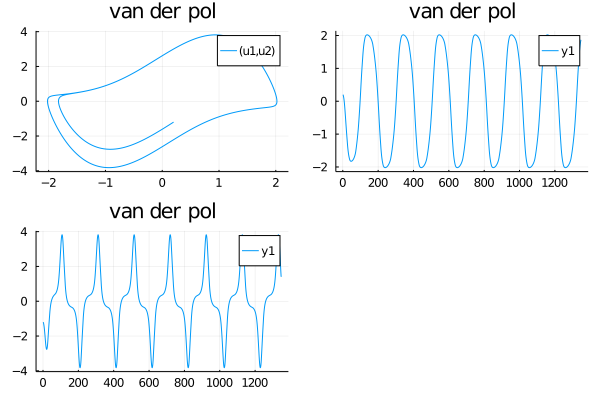

In [15]:
mu =  2
function vdp_sun(du, u, p, t)
    # dx/dt
    du[1] = u[2]
    # dy/dt
    du[2] = mu * (1.0 - u[1]^2.0) * u[2] - u[1]
    du
end
u0=[0.2; -1.2]
tspan=(0.0, 50.0)
prob = ODEProblem(vdp_sun,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)

u1 = []
u2 = []
for i in sol.u
    push!(u1, i[1])
    push!(u2, i[2])
end
plt1 = plot(sol,vars=(1,2),linewidth=1,title="van der pol") # legend=false
plt2 = plot([i for i=1:length(u1)], u1,vars=(1,2),linewidth=1,title="van der pol") # legend=false
plt3 = plot([i for i=1:length(u2)], u2,vars=(1,2),linewidth=1,title="van der pol") # legend=false
#plt4= plot(u1,u2,[i for i=1:length(u1)],title="van der pol", seriestype=contour)
plot(plt1, plt2, plt3)

In [16]:

#plt4= contour(u1,u2,[i for i=1:length(u1)])
#size(sol)

In [32]:
sol.alg


Tsit5()

In [17]:
sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 1348-element Array{Float64,1}:
  0.0
  0.008601005370966162
  0.02389400178793598
  0.041918013124318566
  0.063953675890517
  0.08878281453940369
  0.11646292475453407
  0.14617544406508104
  0.17749158691881828
  0.2098864469371132
  0.24306486324542842
  0.2766483126289079
  0.3103243147940387
  ⋮
 49.79295077469776
 49.816231056684266
 49.838223406638285
 49.85926942804595
 49.87950774392509
 49.899156530153604
 49.91837160290661
 49.93733285188194
 49.95621713096099
 49.97523486408292
 49.99466128672948
 50.0
u: 1348-element Array{Array{Float64,1},1}:
 [0.2, -1.2]
 [0.18958566767278148, -1.2217136964510662]
 [0.17060148912105436, -1.261204399154005]
 [0.1474392028270161, -1.3092229538883804]
 [0.11792295162385831, -1.3701381268151758]
 [0.08302134639420297, -1.4417279271194945]
 [0.04196733400634371, -1.5252389256023342]
 [-0.004735833233258519, -1.619155942947963]
 [-0.057051163057144014, -1.72270387653

In [18]:
# 問題のobject
sol.prob

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 50.0)
u0: 2-element Array{Float64,1}:
  0.2
 -1.2

In [27]:
# 補間機能が利用できるかどうか
sol.dense

true

In [28]:
# 線形解法の回数や収束の失敗など，解法プロセスの内部統計
sol.destats

DiffEqBase.DEStats
Number of function 1 evaluations:                  8085
Number of function 2 evaluations:                  0
Number of W matrix evaluations:                    0
Number of linear solves:                           0
Number of Jacobians created:                       0
Number of nonlinear solver iterations:             0
Number of nonlinear solver convergence failures:   0
Number of rootfind condition calls:                0
Number of accepted steps:                          1347
Number of rejected steps:                          0

In [11]:
# the plot recipe behavior
sol.tslocation

0

┌ Warning: Instability detected. Aborting
└ @ SciMLBase /Users/jabelic/.julia/packages/SciMLBase/yh1iq/src/integrator_interface.jl:351


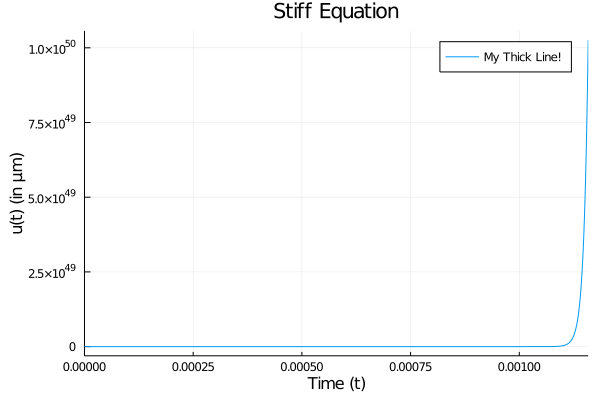

In [19]:
f(u,p,t) = 10^5*u
u0=1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob,Tsit5(),reltol=1e-8,abstol=1e-8)
using Plots
plot(sol,linewidth=1,title="Stiff Equation",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
#plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

In [1]:
using Plots
quiver(u1, u2, quiver=(k*u1, k*u2))

LoadError: [91mUndefVarError: k not defined[39m

In [33]:
xs = -2:0.2:2
ys = -2:0.2:2

using LinearAlgebra

df(x, y) = normalize([-y, x]) ./ 10

xxs = [x for x in xs for y in ys]
yys = [y for x in xs for y in ys]

quiver(xxs, yys, quiver=df)

LoadError: UndefVarError: quiver not defined